# MATPLOTLIB TUTORIAL

## Tutorial Stuff

### Load Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Basic Graph

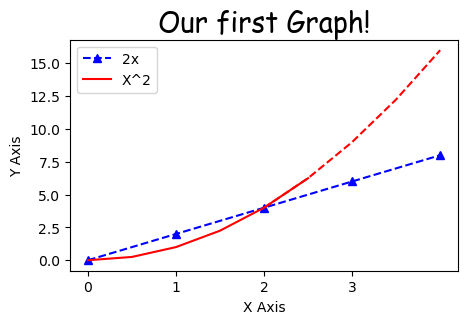

In [3]:
x = [0, 1, 2, 3, 4]
y = [0, 2, 4, 6, 8]

# Resize your graph
plt.figure(figsize=(5, 3), dpi=100)

# Line 1

# Keyword Argument Notation
# plt.plot(x, y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Use shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x, y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0, 4.5, 0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[4:], x2[4:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Our first Graph!', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# X, Y axis Tickmarks (scale of the graph)
plt.xticks([0, 1, 2, 3])
# plt.yticks([0, 2, 4, 6, 8, 10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

### Bar Chart

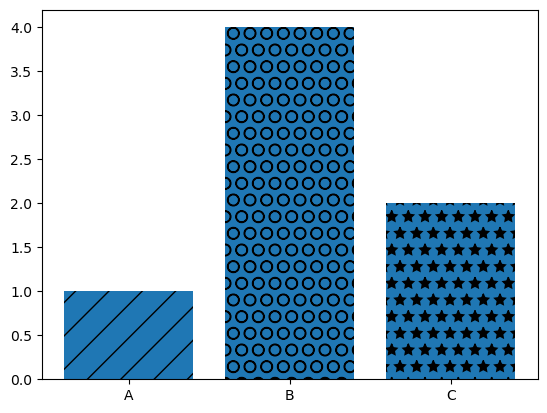

<Figure size 600x400 with 0 Axes>

In [4]:
labels = ['A', 'B', 'C']
values = [1, 4, 2]

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.figure(figsize=(6, 4))

plt.show()

## Real World Examples
Download data from Github

### Line Graph

In [5]:
gas = pd.read_csv('gas_prices.csv')